## Importing Libraries

In [633]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image

# Visualizing Decision Trees

In [634]:
iris = sns.load_dataset('iris')
X = iris.iloc[:,:-1].values
y = iris['species'].values

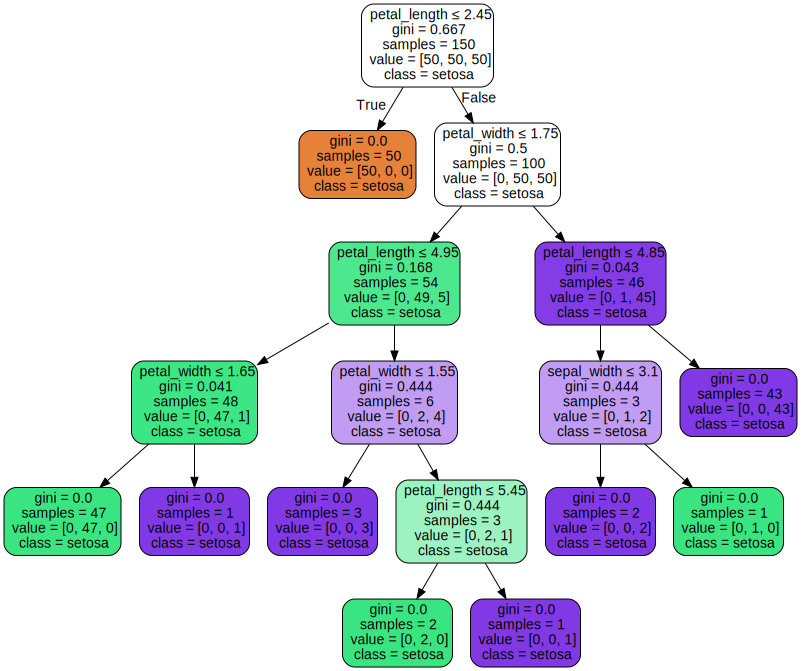

In [635]:
from sklearn import tree
import graphviz
tree_classifier = DecisionTreeClassifier()
tree_classifier= tree_classifier.fit(X,y)

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                     feature_names=iris.columns[:-1],  
                     class_names=iris.species,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data)  

## Decision Tree Jargon
- The very top of our tree is called our **root node** and it splits our data based upon categorical or numeric thresholds
- We filter down into our **internal nodes** which have arrows pointing towards and away which split our data into subsets
- **Leaves** are our final and last decision about that data and what class they fall into

## Small Example

Our goal is to decide whether Chest_Pain, High_colesterol or Strong_Blood_circulation should be our root node.
We can think of our crosstab table almost as a confusion matrix and look at how well each of these variables seperate patients with and without heart disease.


In [636]:
np.random.seed(40)
df = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.65,0.35], size=300), 'High_colesterol': np.random.choice(['1', '0'], size=300),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.7,0.3], size=300), "Heart_disease":np.random.choice(['1', '0'], size=300)})

print(df)
print()
print(pd.crosstab(df['Chest_Pain'],df['Heart_disease']))
print()
print(pd.crosstab(df['High_colesterol'],df['Heart_disease']))
print()
print(pd.crosstab(df['Strong_Blood_circulation'],df['Heart_disease']))

    Chest_Pain High_colesterol Strong_Blood_circulation Heart_disease
0            1               0                        1             1
1            1               1                        0             0
2            0               1                        1             0
3            1               1                        1             1
4            1               0                        1             0
..         ...             ...                      ...           ...
295          1               0                        1             0
296          1               1                        1             0
297          1               0                        1             0
298          1               1                        0             1
299          1               1                        1             0

[300 rows x 4 columns]

Heart_disease    0   1
Chest_Pain            
0               40  52
1              111  97

Heart_disease     0   1
High_colesterol   

# Gini Impurity 
Because none of our leave nodes are 100% True or False they are all considered impure so Which Seperation is the Best? We need a way to measure and compare impurity

### Gini Impurity Formula

$$Gini = 1 - \sum_{k=1}^{n}(p_{i,k})^{2}$$

Where:
- $p_i,k$ is the ratio of class k instances among the training instances in the $i^{th}$ node.


# The CART Training Algorithm

#### Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees 

This algorithym searches for the pair (k, tk) that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is as follows:
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

where: 
- $G_{left/right}$ measures the impurity of the left/right subset,
- $m_{left/right}$ is the number of instances in the left/right subset.


## Chest pain seperates patients with and without heart disease the 'best' (lowest Impurity)

### Gini Impurity for chest pain

$$ G_L = 1 - (\frac{97}{97+111})^{2} - (\frac{111}{97+111})^{2}$$  
  
  
$$= 0.4977 $$  
  
$$ G_R = 1 - (\frac{52}{40+52})^{2} - (\frac{40}{52+40})^{2}$$  
  
  
$$= 0.491 $$  
  
  

$$\text{Weighted Average} = \frac{208}{208+92}0.4977 + \frac{92}{208+92}0.491$$  
  
    
    

$$\text{Gini Impurity for Chest Pain = 0.49}$$

### Gini Impurity for High Colesterol

$$ G_L = 1 - (\frac{68}{78+68})^{2} - (\frac{78}{78+68})^{2}$$  
  
  
$$= 0.4976 $$  
  
$$ G_R = 1 - (\frac{81}{81+73})^{2} - (\frac{73}{81+73})^{2}$$  
  
  
$$= 0.4986 $$  
  
  

$$\text{Weighted Average} = \frac{146}{154+146}0.4976 + \frac{154}{154+146}0.4986$$  
  
    
    

$$\text{Gini Impurity for High Colesterol = 0.498}$$  
  
  

### Gini Impurity for Blood Circulation

$$ G_L = 1 - (\frac{52}{49+52})^{2} - (\frac{49}{49+52})^{2}$$  
  
  
$$= 0.499 $$  
  
$$ G_R = 1 - (\frac{97}{102+97})^{2} - (\frac{102}{97+102})^{2}$$  
  
  
$$= 0.4996 $$  
  
  

$$\text{Weighted Average} = \frac{101}{101+199}0.499 + \frac{199}{199+101}0.499$$  
  
    
    
  
  
$$\text{Gini Impurity for Blood Circulation = 0.4995}$$


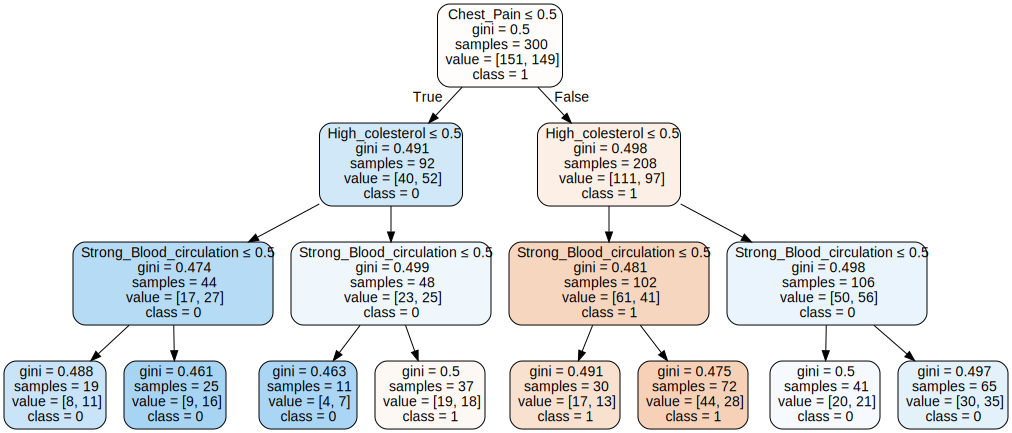

In [637]:
x = df.drop('Heart_disease',axis=1).values
Y = df['Heart_disease'].values

clf = DecisionTreeClassifier()
clf = clf.fit(x,Y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=df.columns[:-1],  
                     class_names=df.Heart_disease,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data) 

## Interpreation

1. We can see from our calculation that Chest Pain contained the lowest impurity so it became our root node.  
  
  
  
    - Each of our leaves from our crosstab contained mixtures of patients with and without heart Disease  
      
    - Those impure crosstab leaves became our internal nodes steming from our root node  
      
    - Now we need to know how well High colesterol and Blood circulation separate the patients in our internal node
    
    - Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively.
 
 
 
2. Just like before we calculate the gini impurity on these nodes using High colesterol and Blood circulation
   
   
    - The identifier with the lowest gini impurity will be used to separate these nodes  
      
    - In our graph this was High colesterol
  
  
3. Notably, if the node iteself has the lowest gini score then there is no point in separating that node any more  
  
  
    - This becomes our leaf node  
      
    - It stops recursing once it reaches the maximum depth

# Numeric Data

### step 1: Sort Patients by weight


In [638]:
np.random.seed(55)

df1 = pd.DataFrame({"Weight": np.random.randint(40,80,20), 'Heart_Disease': np.random.choice(['1', '0'],p = [0.15,0.85], size=20)})
df2 = pd.DataFrame({"Weight": np.random.randint(82,110,20), 'Heart_Disease': np.random.choice(['1', '0'],p = [0.8,0.2], size=20)})
df3 = pd.concat([df2,df1],axis=0)

#df3 = df3.sort_values(by = ['Weight'])
df3 = df3.reset_index(drop = True)
df3.head(10)

,Weight,Heart_Disease
0,105,0
1,109,1
2,100,1
3,106,1
4,92,1
5,82,1
6,103,1
7,92,1
8,104,0
9,85,1


### step 2: calculate the average weight for adjacent patients


In [639]:
weight = df3.sort_values(by = ['Weight'],ascending= True)
weight['Mean'] = weight['Weight'].rolling(2).mean()
weight.head(8)

,Weight,Heart_Disease,Mean
35,47,0,NaN
23,48,0,47.5
38,48,0,48.0
39,50,0,49.0
33,52,0,51.0
31,53,0,52.5
20,53,0,53.0
34,64,0,58.5


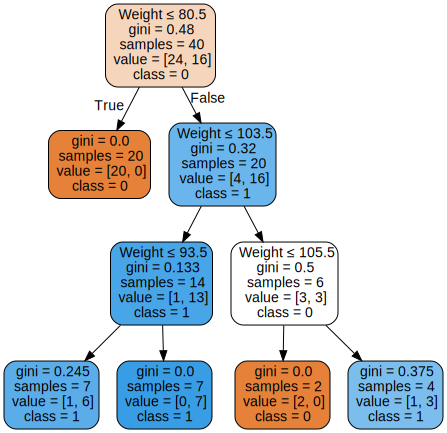

In [640]:
A = df3.iloc[:,:-1].values
B = df3['Heart_Disease'].values

dtree_clf = DecisionTreeClassifier(max_depth = 3)
dtree_clf = dtree_clf.fit(A,B)

data = tree.export_graphviz(dtree_clf, out_file=None, 
                     feature_names=df3.columns[:-1],  
                     class_names=df3['Heart_Disease'],  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(data) 

## Interpreation

1. The lowest impurity occurs when we separate using weight is $\leq 80.5$

#### Prediction 
* Suppose a patient comes in and you want to classify whether they have heart disease or not. 
* You start at the root node. This node asks whether the patients weight is less than or equal to 80.5kg’s. If the patient is, then you move down to the root’s left child node. 
* In this case, it is a leaf node you can simply look at the predicted class for that node and the Decision Tree predicts that your patient does not have heart Disease (class=0).

Note Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children. However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two children.

<Figure size 720x576 with 0 Axes>

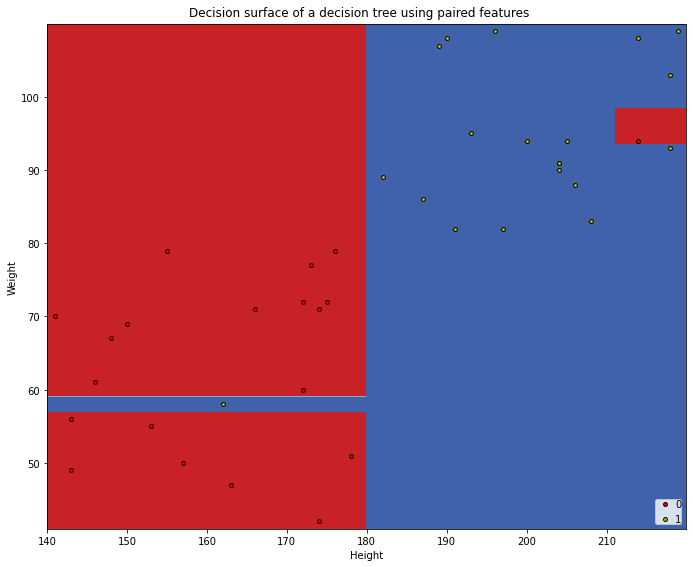

<Figure size 720x576 with 0 Axes>

In [658]:

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

# Load data
np.random.seed(60)

df4 = pd.DataFrame({"Height": np.random.randint(140,180,20),"Weight": np.random.randint(40,80,20), 'Heart_Disease': np.random.choice([1, 0],p = [0.15,0.85], size=20)})
df5 = pd.DataFrame({"Height": np.random.randint(180,220,20),"Weight": np.random.randint(82,110,20), 'Heart_Disease': np.random.choice([1, 0],p = [0.8,0.2], size=20)})
df6 = pd.concat([df4,df5],axis=0)

df7 = df6.reset_index(drop = True)

df7 = df7.sort_values(by = ['Heart_Disease'])

for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = df7.iloc[:, pair].values
    y = df7.Heart_Disease.astype(int).values

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.figure(figsize = [10,8])
    plt.subplot(1,1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df7.columns[pair[0]])
    plt.ylabel(df7.columns[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label= df7.Heart_Disease.unique()[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure(figsize = [10,8])




(1.0, 5.380000000000004, 0.0, 7.88)

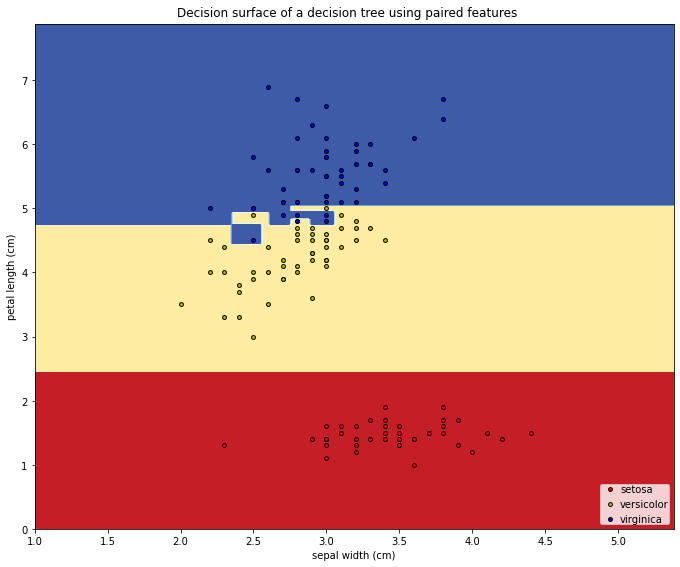

In [659]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[1, 2]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.figure(figsize = [10,8])
    plt.subplot(1,1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")



## Estimating Class Probabilities

* A Decision Tree can return the estimated probability that an instance belongs to a certain class.   
  
  
* Our algorithym traverses the tree to find a leaf node for this $i^{th}$ instance and then it return the ratio.   
  
  
* For example, suppose you have two patients whose weights are 70 and 100 respectively.   
 
 
* The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 100% for  not having Heart Disease (20/20) and 0% for Heart Disease (0/20), And of course if you ask it to predict the class, it should show the outcomes below

In [626]:
print(dtree_clf.predict_proba([[70]]))
print(dtree_clf.predict_proba([[100]]))

[[1. 0.]]
[[0. 1.]]


# Regularization

Decision Trees make very few assumptions about the training data and as such this model is often called a nonparametric model, not because it does not have any parameters prior to training so the model structure is
free to stick closely to the data. The DecisionTreeClassifier class has a few parameters that similarly restrict
the shape of the Decision Tree. Below we will show how a model overfits when our max depth is set from 2 to 4.

<Figure size 720x576 with 0 Axes>

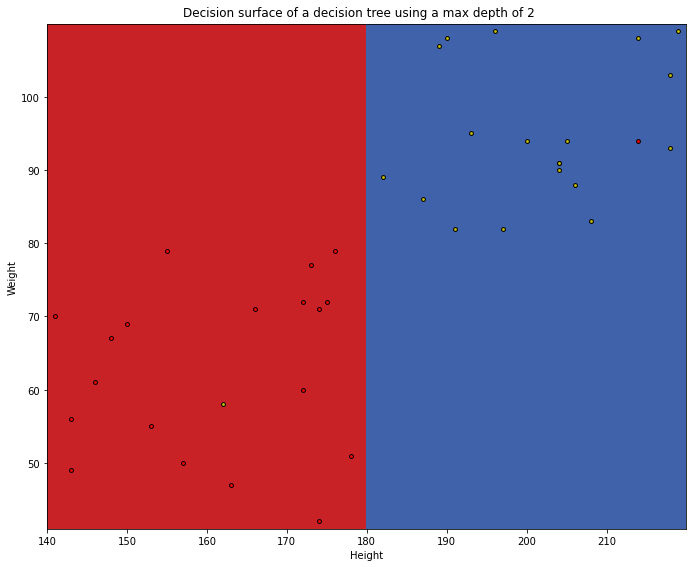

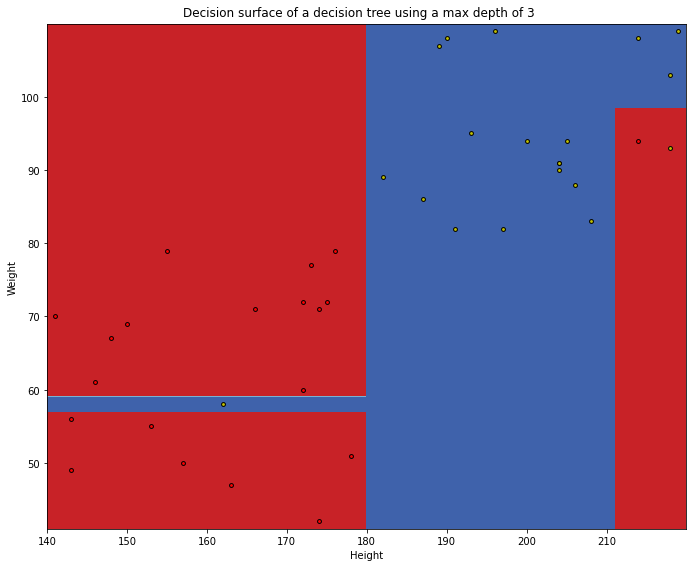

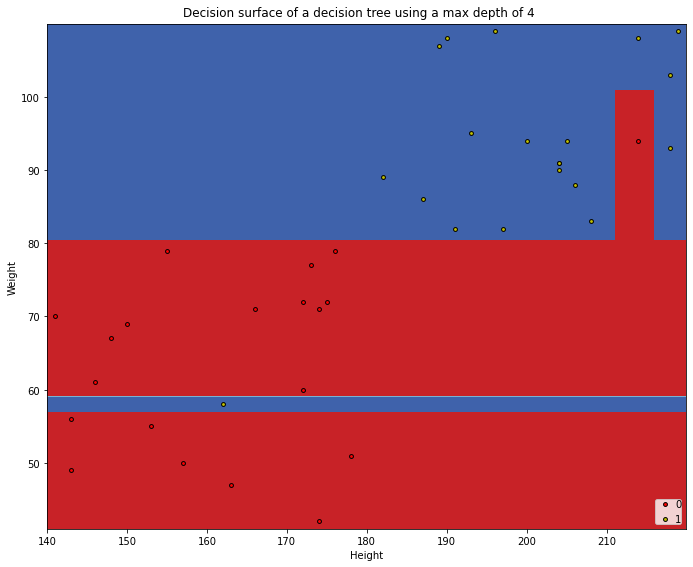

<Figure size 720x576 with 0 Axes>

In [684]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

# Load data
np.random.seed(60)

df4 = pd.DataFrame({"Height": np.random.randint(140,180,20),"Weight": np.random.randint(40,80,20), 'Heart_Disease': np.random.choice([1, 0],p = [0.15,0.85], size=20)})
df5 = pd.DataFrame({"Height": np.random.randint(180,220,20),"Weight": np.random.randint(82,110,20), 'Heart_Disease': np.random.choice([1, 0],p = [0.8,0.2], size=20)})
df6 = pd.concat([df4,df5],axis=0)

df7 = df6.reset_index(drop = True)

df7 = df7.sort_values(by = ['Heart_Disease'])


# We only take the two corresponding features
X = df7.iloc[:, :2].values
y = df7.Heart_Disease.astype(int).values

# Train
for depth in range(2,5):
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)

    # Plot the decision boundary
    plt.figure(figsize = [10,8])
    plt.subplot(1,1,1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df7.columns[pair[0]])
    plt.ylabel(df7.columns[pair[1]])

        # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label= df7.Heart_Disease.unique()[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        plt.suptitle(f"Decision surface of a decision tree using a max depth of {depth}")


plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure(figsize = [10,8])
